In [21]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.metrics import pairwise_distances

import itertools
from itertools import cycle

%matplotlib inline

In [22]:
df2013 = pd.read_csv("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2013/results.csv")
df2013.head(30)

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88
5,77.25,28,"Gebremariam, Gebregziabher",3,30.88,M,64.92,130.47,3,NaN,...,3,4.98,NaN,92.72,15.93,3,61.53,108.70,Tigray,123.78
6,50.50,42,"Soejima, Masazumi",6,18.73,M,41.98,90.02,W4,NaN,...,6,3.43,NaN,61.63,8.98,6,39.87,74.00,Fukuoka,84.67
7,77.23,28,"Geneti, Markos",6,30.88,M,64.90,132.73,4,NaN,...,6,5.07,NaN,92.93,15.90,6,61.52,109.07,Addis Ababa,125.20
8,52.62,49,"Schabort, Krige",11,19.77,M,43.97,91.78,W5,NaN,...,11,3.50,GA,64.00,9.38,11,41.77,75.95,Cedartown,86.48
9,77.25,32,"Merga, Deriba",25,30.90,M,64.92,141.67,5,NaN,...,27,5.42,NaN,92.77,15.93,27,61.53,111.13,Addis Ababa,131.98


In [23]:
df2013.dtypes

25k           object
age            int64
name          object
division       int64
10k           object
gender        object
half          object
official     float64
bib           object
ctz           object
country       object
overall        int64
pace         float64
state         object
30k           object
5k            object
genderdiv      int64
20k           object
35k           object
city          object
40k           object
dtype: object

In [24]:
null_count = df2013.isnull().sum()
null_count[null_count>0]

ctz      15407
state     1463
city         1
dtype: int64

In [25]:

df2013['gender'] = np.where(df2013.gender.values == 'F', 1, 0)
df2013.city.fillna('Buenos Aires', inplace=True)
df2013.state.fillna(df2013.city, inplace=True)
df2013 = df2013.drop(['ctz', 'bib', 'name', 'city'], 1)
kilos = ['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']
for k in kilos:
    df2013[k] = df2013[k].convert_objects(convert_numeric=True)
df2013 = df2013.dropna()

#For loop wasn't working so I did it individually
df2013['5k'] = df2013['5k'] * 100
df2013['5k'] = df2013['5k'].astype(int)
df2013['10k'] = df2013['10k'] * 100
df2013['10k'] = df2013['10k'].astype(int)
df2013['20k'] = df2013['20k'] * 100
df2013['20k'] = df2013['20k'].astype(int)
df2013['25k'] = df2013['25k'] * 100
df2013['25k'] = df2013['25k'].astype(int)
df2013['30k'] = df2013['30k'] * 100
df2013['30k'] = df2013['30k'].astype(int)
df2013['35k'] = df2013['35k'] * 100
df2013['35k'] = df2013['35k'].astype(int)
df2013['40k'] = df2013['40k'] * 100
df2013['40k'] = df2013['40k'].astype(int)
df2013['half'] = df2013['half'] * 100
df2013['half'] = df2013['half'].astype(int)
df2013['pace'] = df2013['pace'] * 100
df2013['pace'] = df2013['pace'].astype(int)
df2013['official'] = df2013['official'] * 100
df2013['official'] = df2013['official'].astype(int)


/Users/bryancorder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [26]:
country = list(df2013.country.unique())
state = list(df2013.state.unique())
country_key = list(range(len(country)))
state_key = list(range(len(state)))
country_dict = dict(list(zip(country, country_key)))
state_dict = dict(list(zip(state, state_key)))
print(country_dict, state_dict)

{'CAN': 0, 'KEN': 1, 'ETH': 2, 'AUS': 3, 'JPN': 4, 'USA': 5, 'RSA': 6, 'POL': 7, 'SUI': 8, 'ESP': 9, 'FRA': 10, 'ITA': 11, 'ECU': 12, 'RUS': 13, 'MEX': 14, 'BER': 15, 'GBR': 16, 'DEN': 17, 'NED': 18, 'CRC': 19, 'ISL': 20, 'IRL': 21, 'GER': 22, 'AUT': 23, 'GRE': 24, 'GUA': 25, 'DOM': 26, 'UKR': 27, 'SWE': 28, 'NOR': 29, 'SVK': 30, 'BAH': 31, 'BRA': 32, 'HKG': 33, 'KOR': 34, 'VEN': 35, 'CZE': 36, 'HUN': 37, 'SLO': 38, 'COL': 39, 'PER': 40, 'SIN': 41, 'CHI': 42, 'FIN': 43, 'CHN': 44, 'BEL': 45, 'ARG': 46, 'UAE': 47, 'URU': 48, 'NZL': 49, 'ISR': 50, 'PAN': 51, 'TWN': 52, 'LTU': 53, 'IND': 54, 'POR': 55, 'MAS': 56, 'CAY': 57, 'EST': 58, 'TRI': 59, 'ESA': 60, 'PHI': 61, 'VGB': 62, 'ARU': 63, 'QAT': 64, 'TCA': 65, 'BOL': 66, 'TUR': 67} {'ON': 0, 'Kenya': 1, 'Ambo': 2, 'Hamilton': 3, 'Iizuka': 4, 'Tigray': 5, 'Fukuoka': 6, 'Addis Ababa': 7, 'GA': 8, 'Kitale': 9, 'Paarl': 10, 'Bystra': 11, 'Nottwil': 12, 'Nandi': 13, 'Manlleu': 14, 'Etziken': 15, 'QC': 16, 'Sant Juluia De Vilatorta': 17, 'Les F

In [27]:
df2013['country'] = df2013['country'].replace(country_dict)
df2013['state'] = df2013['state'].replace(state_dict)
df2013.head(10)

,25k,age,division,10k,gender,half,official,country,overall,pace,state,30k,5k,genderdiv,20k,35k,40k
0,4987,28,9,1818,0,4093,9090,0,9,347,0,6207,890,9,3879,7473,8555
1,7727,30,5,3090,0,6490,13250,1,5,507,1,9297,1590,5,6152,10878,12477
2,7723,23,1,3090,0,6492,13037,2,1,498,2,9272,1593,1,6153,10868,12378
3,5050,32,5,1873,0,4200,8843,3,5,338,3,6135,898,5,3988,7300,8343
4,4875,39,3,1818,0,4057,8722,4,3,333,4,5992,892,3,3854,7168,8188
5,7725,28,3,3088,0,6492,13047,2,3,498,5,9272,1593,3,6153,10870,12378
6,5050,42,6,1873,0,4198,9002,4,6,343,6,6163,898,6,3986,7400,8467
7,7723,28,6,3088,0,6490,13272,2,6,507,7,9293,1590,6,6152,10907,12520
8,5262,49,11,1977,0,4397,9178,5,11,350,8,6400,938,11,4177,7595,8648
9,7725,32,25,3090,0,6492,14166,2,27,542,7,9277,1593,27,6153,11113,13197


In [28]:
df2013['age_bin'] = pd.qcut(df2013['age'], 6, labels=False)
df2013['pace_bin'] = pd.qcut(df2013['pace'], 5, labels=False)
df2013.head(10)

,25k,age,division,10k,gender,half,official,country,overall,pace,state,30k,5k,genderdiv,20k,35k,40k,age_bin,pace_bin
0,4987,28,9,1818,0,4093,9090,0,9,347,0,6207,890,9,3879,7473,8555,0,0
1,7727,30,5,3090,0,6490,13250,1,5,507,1,9297,1590,5,6152,10878,12477,0,0
2,7723,23,1,3090,0,6492,13037,2,1,498,2,9272,1593,1,6153,10868,12378,0,0
3,5050,32,5,1873,0,4200,8843,3,5,338,3,6135,898,5,3988,7300,8343,1,0
4,4875,39,3,1818,0,4057,8722,4,3,333,4,5992,892,3,3854,7168,8188,2,0
5,7725,28,3,3088,0,6492,13047,2,3,498,5,9272,1593,3,6153,10870,12378,0,0
6,5050,42,6,1873,0,4198,9002,4,6,343,6,6163,898,6,3986,7400,8467,2,0
7,7723,28,6,3088,0,6490,13272,2,6,507,7,9293,1590,6,6152,10907,12520,0,0
8,5262,49,11,1977,0,4397,9178,5,11,350,8,6400,938,11,4177,7595,8648,4,0
9,7725,32,25,3090,0,6492,14166,2,27,542,7,9277,1593,27,6153,11113,13197,1,0


In [29]:
columns = ['country', 'pace_bin']
for x in columns:
    print(df2013[x].value_counts())


5     13083
0      1525
16      178
4       107
14      105
22       86
32       80
11       76
3        76
10       64
9        50
28       48
17       45
18       42
8        37
33       32
39       29
21       28
41       22
23       21
35       21
29       21
19       19
34       19
42       15
20       15
13       14
7        14
46       13
25       12
      ...  
36        7
12        5
15        5
52        5
53        4
50        4
38        4
2         4
56        4
40        3
54        3
48        3
57        3
63        2
26        2
58        2
27        2
60        2
37        2
31        2
47        2
51        2
65        1
66        1
55        1
59        1
64        1
67        1
61        1
62        1
Name: country, Length: 68, dtype: int64
2    3252
0    3241
3    3225
1    3225
4    3111
Name: pace_bin, dtype: int64


In [30]:
X = df2013.drop(['age', 'pace'], 1)
X_norm = df2013.drop(['age', 'pace'], 1)
X_norm = normalize(X_norm)

In [31]:
kclust = np.arange(2, 20, 2)
for k in kclust:
    # Calculate predicted values.
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    kmeans.fit(X_norm)

    # Check the solution against the data.
    labelskm = kmeans.labels_
    print(metrics.silhouette_score(X, labelskm, metric='euclidean'), 
          metrics.silhouette_score(X_norm, labelskm, metric='euclidean'))

0.503028126901 0.491530752029
0.396774001958 0.434312036389
0.346215100621 0.420488885096
0.36173601162 0.408793193835
0.338751790578 0.375136258353
0.334052538984 0.397091571678
0.318339096094 0.394610334835
0.320850160841 0.39122484632
0.315532882253 0.387019335456


In [32]:
sclust = np.arange(2, 5, 1)
for s in sclust:
    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=s)
    sc.fit(X)
    sc.fit(X_norm)
    labelssc = sc.labels_
    print(metrics.silhouette_score(X, labelssc, metric='euclidean'), 
         metrics.silhouette_score(X_norm, labelssc, metric='euclidean'))

/Users/bryancorder/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


0.501528406321 0.491315964938
0.311669576047 0.361976675987
0.220411031134 0.274853917224


In [33]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
    
# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X) 

# Extract cluster assignments for each data point.
labelsms = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labelsms))

print("Number of estimated clusters: {}".format(n_clusters_))
print('Comparing the assigned categories to the ones in the data:')
print(metrics.silhouette_score(X, labelsms, metric='euclidean'))

Number of estimated clusters: 2
Comparing the assigned categories to the ones in the data:
0.473935632689


In [34]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labelsaf = af.labels_
print(metrics.silhouette_score(X, labelsaf, metric='euclidean'))

Done
0.169850434358


In [35]:
kmeans = KMeans(n_clusters=6, random_state=42)
df2013_fitted = kmeans.fit(X_norm)
labels = kmeans.labels_
df2013['clusters'] = labels

In [36]:
grouped = df2013.groupby(['clusters'],as_index=False).mean()
grouped_counts = df2013.groupby(['clusters'],as_index=False).count()
column_names = list(grouped)
print(column_names)
grouped.head(10)

['clusters', '25k', 'age', 'division', '10k', 'gender', 'half', 'official', 'country', 'overall', 'pace', 'state', '30k', '5k', 'genderdiv', '20k', '35k', '40k', 'age_bin', 'pace_bin']


,clusters,25k,age,division,10k,gender,half,official,country,overall,pace,state,30k,5k,genderdiv,20k,35k,40k,age_bin,pace_bin
0,0,10944.222439,41.051811,1176.189326,4354.738995,0.000000,9207.009739,19189.321387,6.235684,4147.855084,732.673938,75.841060,13255.604597,2187.588625,3712.544215,8728.857811,15657.932217,18108.132450,2.314764,0.768212
1,1,13193.291578,41.686531,1531.380359,5180.524476,1.000000,11048.556096,23304.581332,5.213743,14279.706902,889.471572,64.569474,16069.844026,2592.907875,5079.798723,10469.311341,19062.322590,22025.008209,2.427790,3.585284
2,2,12798.277778,51.946208,1221.978836,4998.421517,0.000441,10692.251323,23309.074956,6.235009,14082.298060,889.664903,91.116402,15678.644621,2495.444444,9111.306878,10127.219136,18765.483686,21944.848325,3.988095,3.520723
3,3,12097.992495,35.646529,993.318574,4815.036398,1.000000,10178.289306,20937.064165,5.303565,8318.196623,799.257411,62.747842,14636.937711,2418.368480,1898.010882,9650.066041,17238.106942,19812.613884,1.402627,1.984991
4,4,11803.301271,47.398729,1118.684746,4670.934746,0.000000,9914.946610,20856.176695,6.204237,8075.410169,796.201271,89.251695,14333.422034,2340.061864,6319.538983,9397.321186,16981.499576,19674.398729,3.410169,1.927966
5,5,10041.917728,34.868847,531.755594,4001.177281,0.169019,8459.902926,17345.450258,6.251635,1570.554217,662.361446,61.108090,12129.766954,2008.162823,1019.714286,8022.621687,14263.834423,16398.963167,1.306024,0.089157


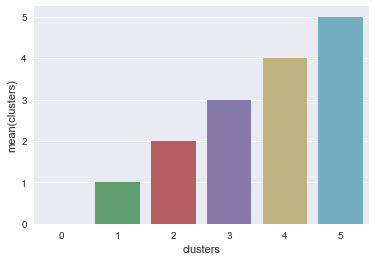

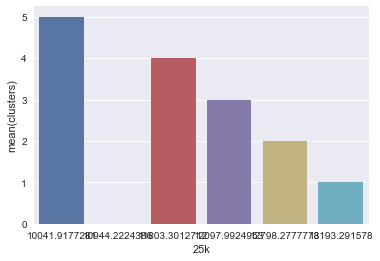

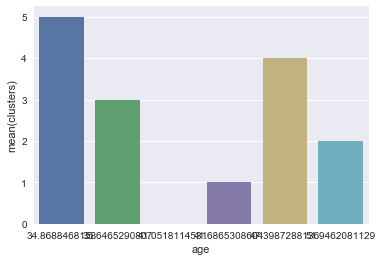

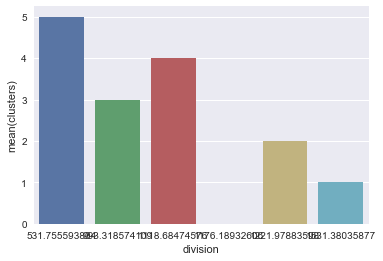

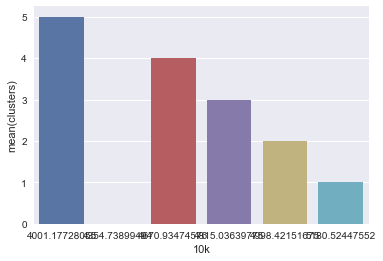

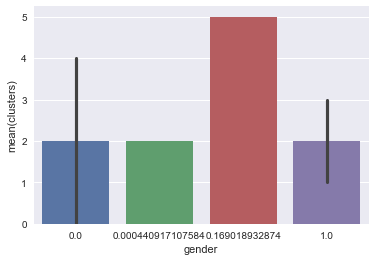

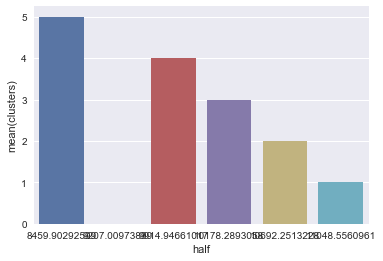

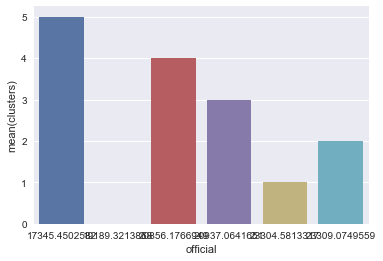

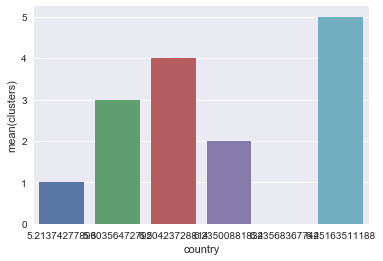

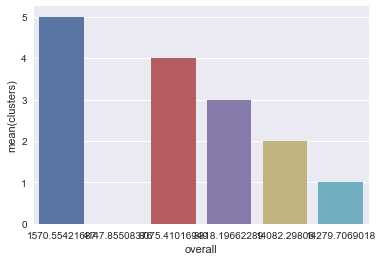

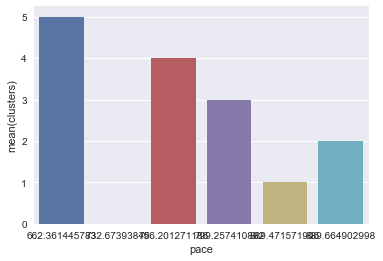

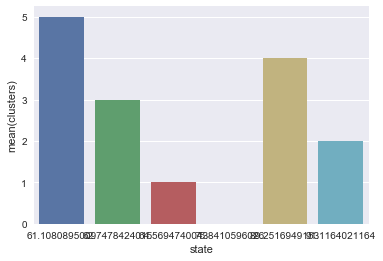

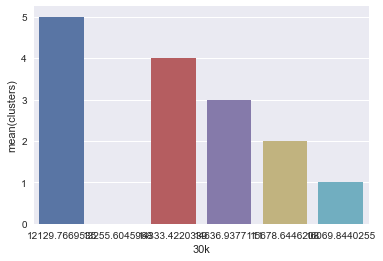

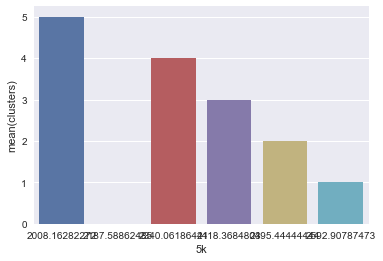

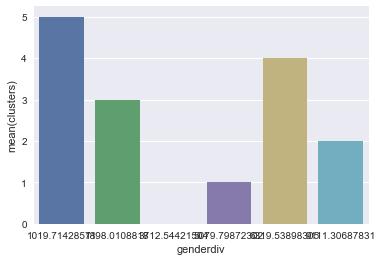

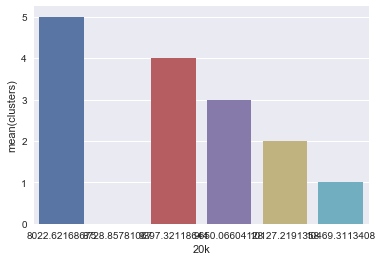

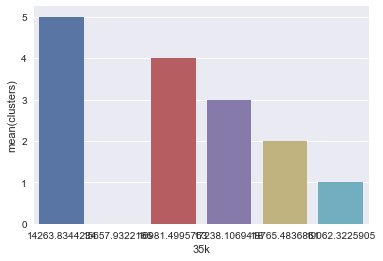

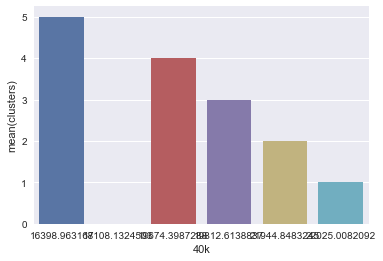

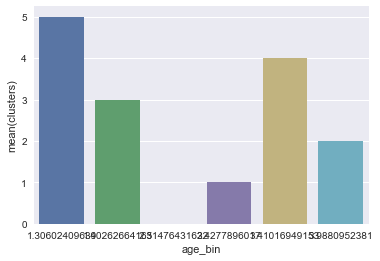

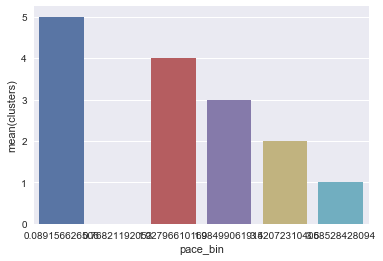

In [37]:
for feature in column_names:
    sns.barplot(x=feature, y=grouped.clusters, data=grouped)
    plt.show()

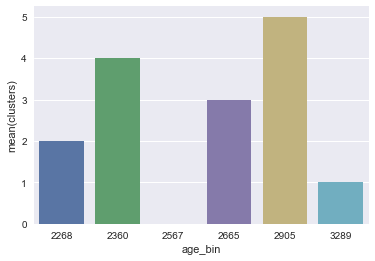

In [38]:

sns.barplot(x=grouped_counts.age_bin, y=grouped_counts.clusters, data=grouped_counts)
plt.show()

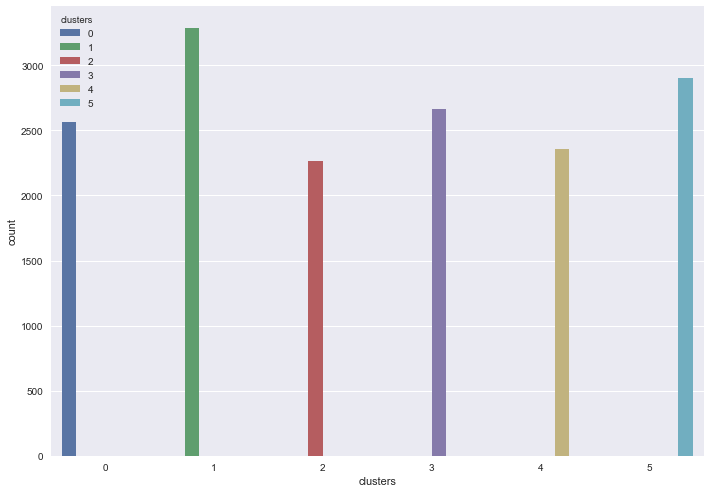

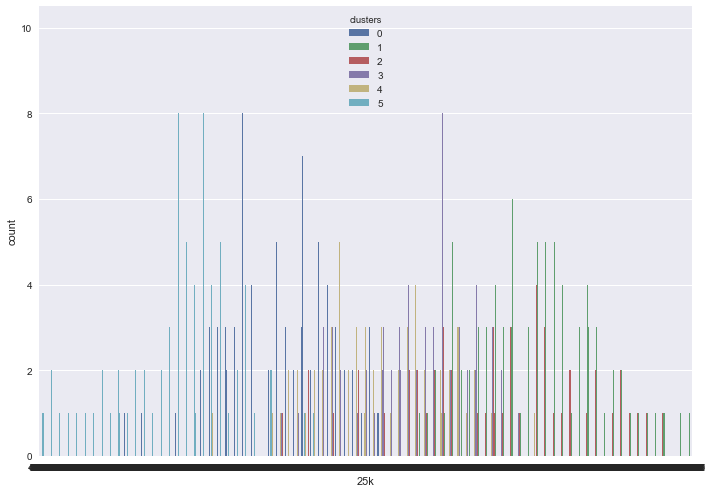

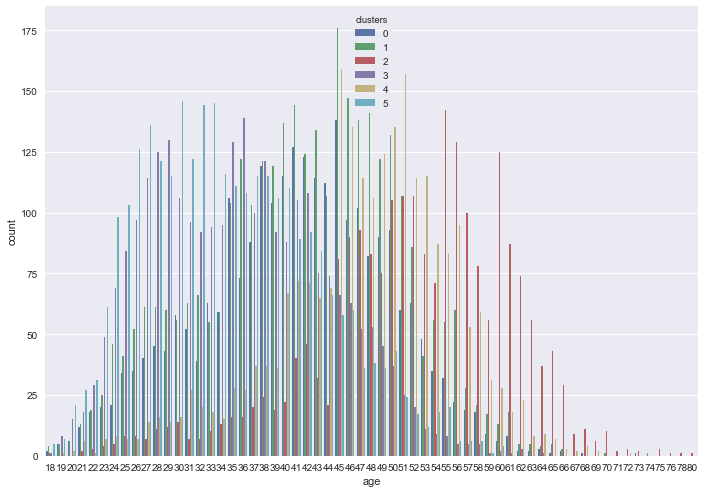

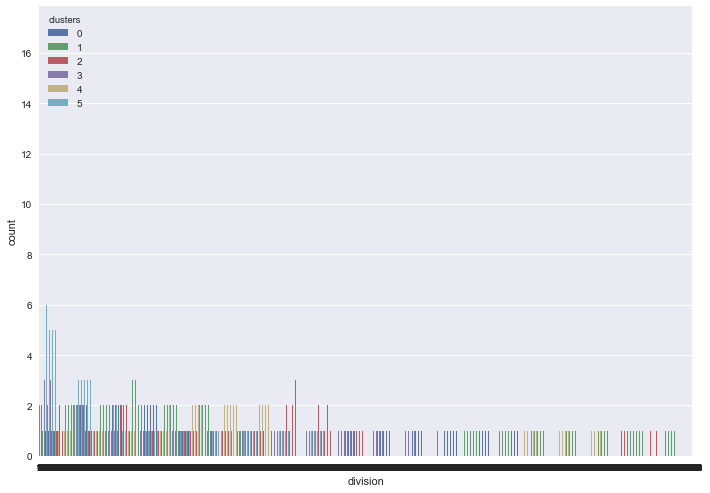

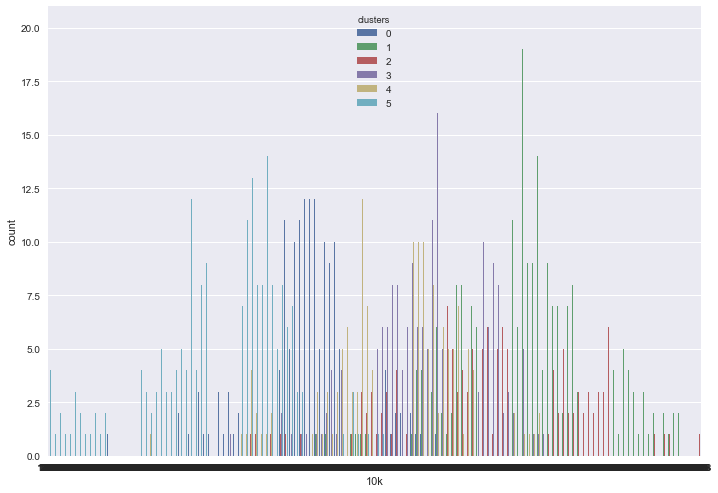

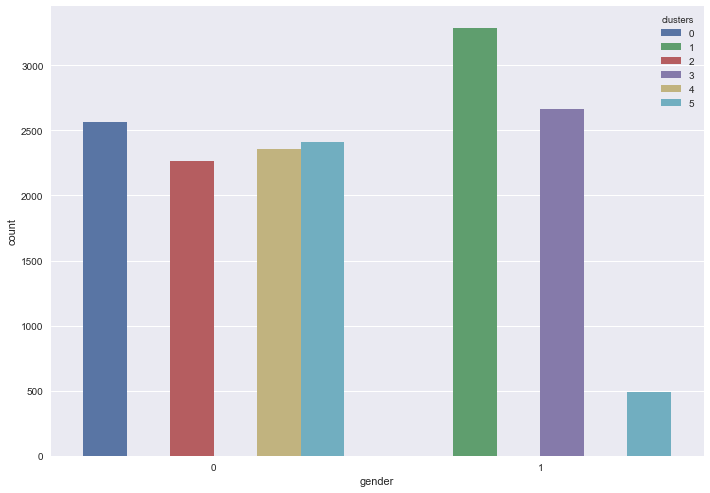

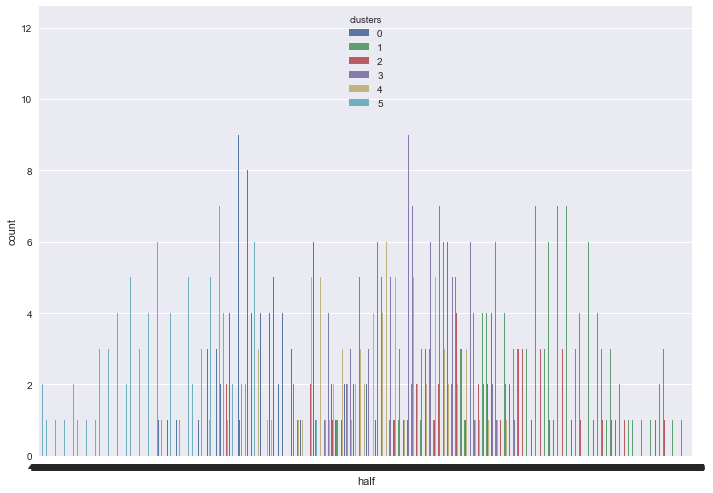

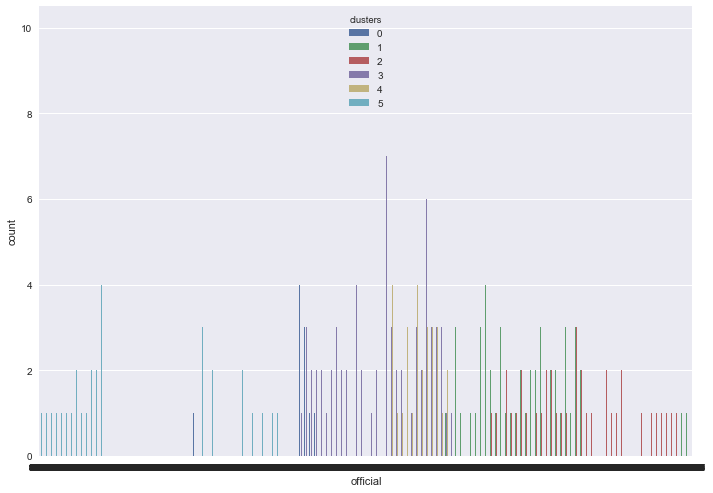

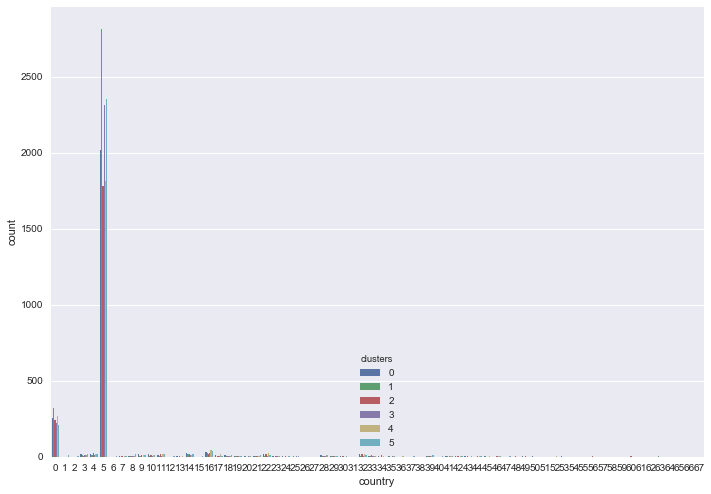

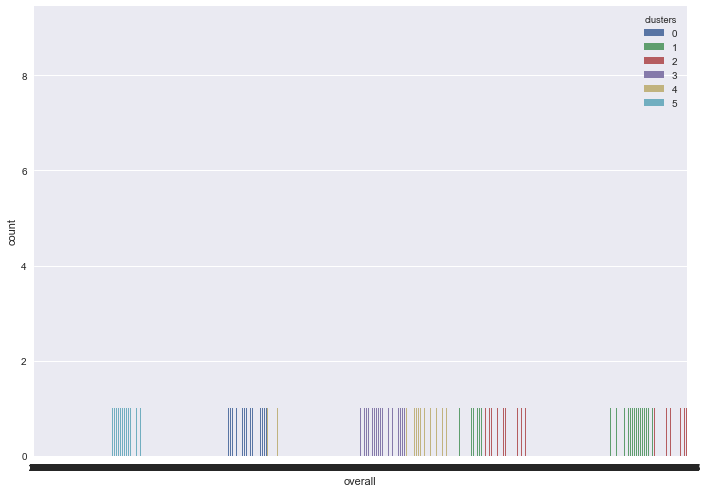

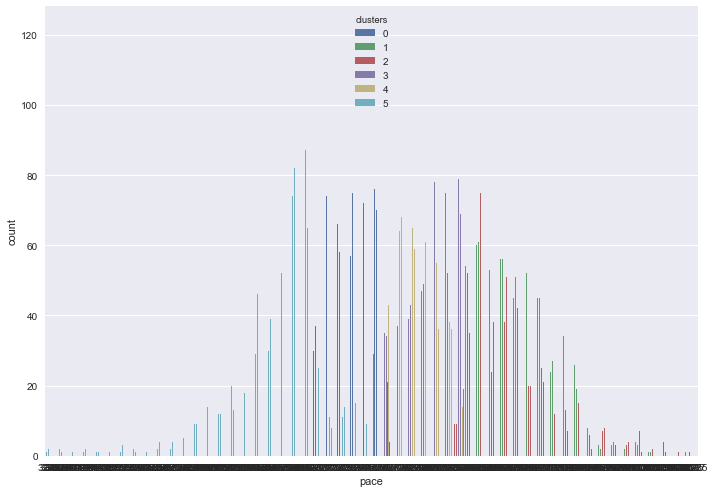

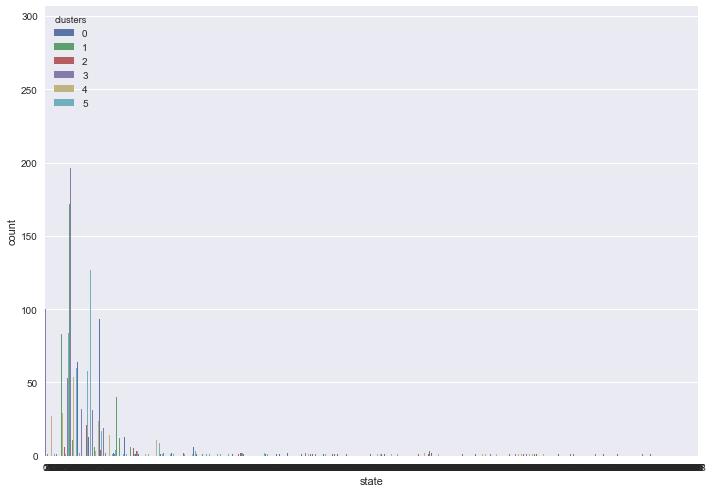

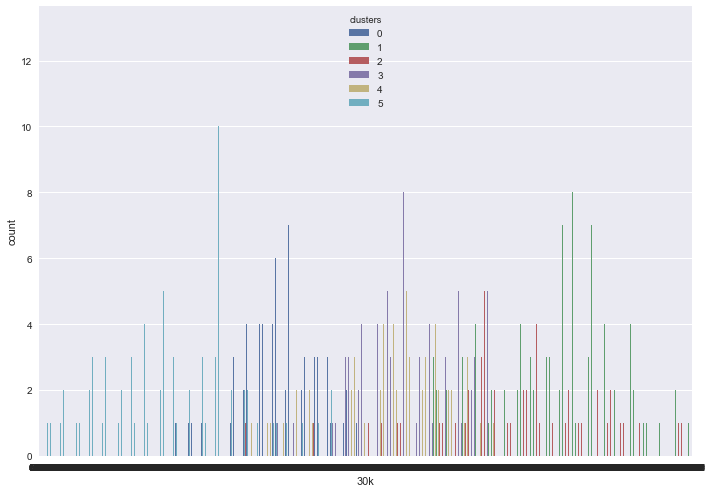

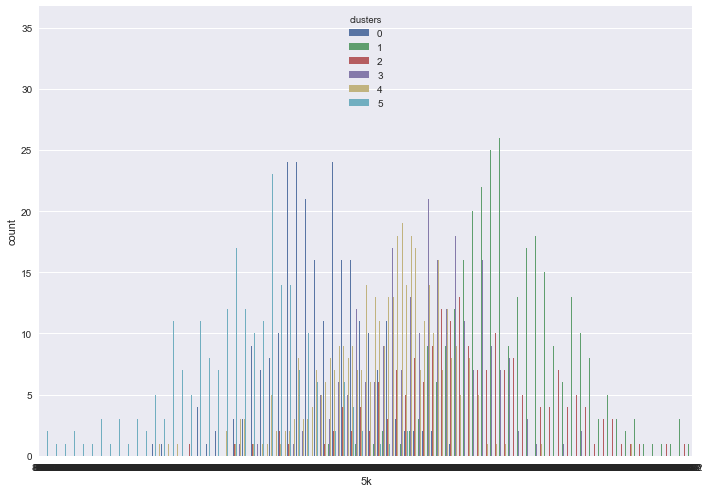

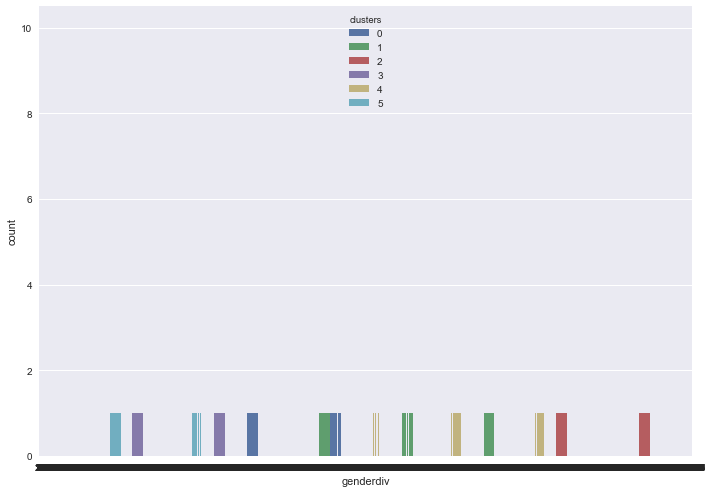

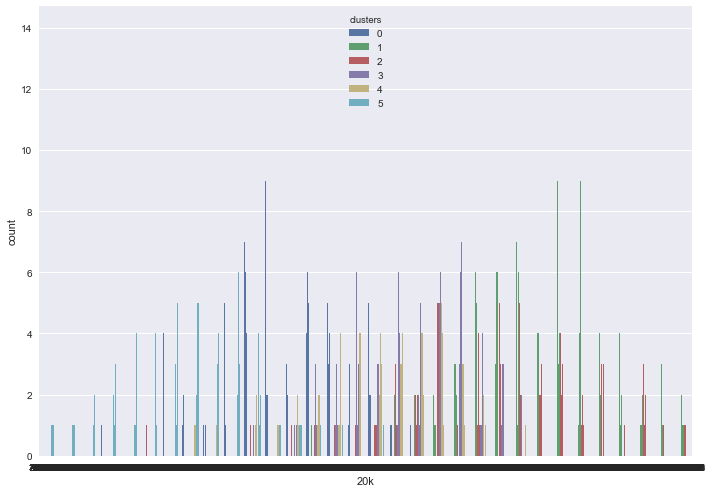

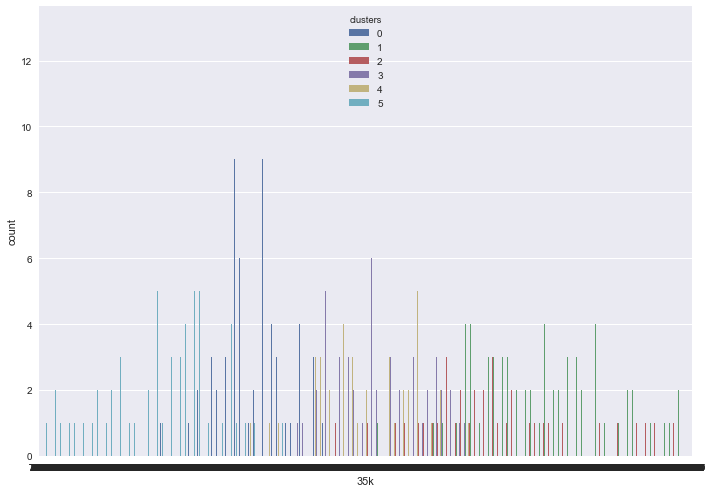

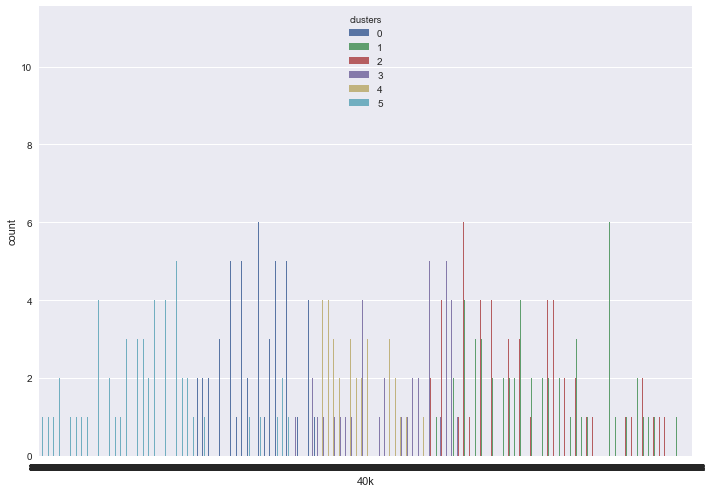

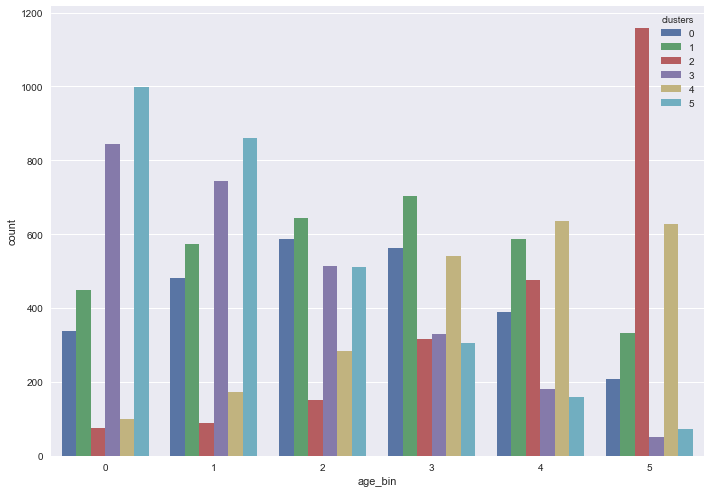

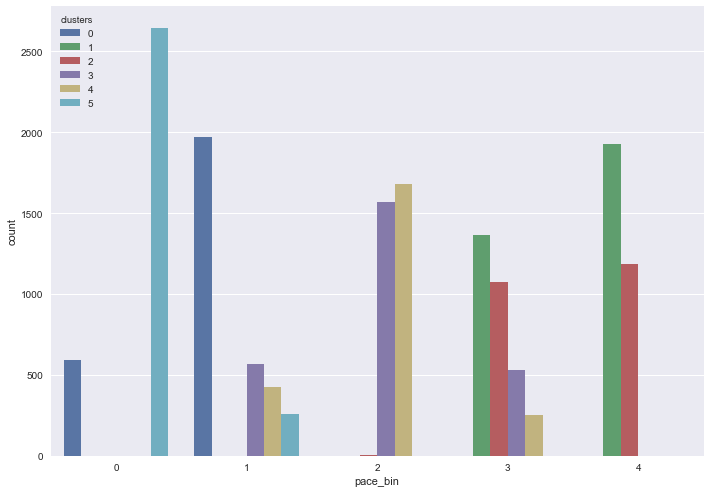

In [39]:
for feature in column_names:
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)
    sns.countplot(x=feature, hue=df2013.clusters, data=df2013, ax=ax)
    plt.show()

In [40]:
pd.crosstab(df2013.clusters,df2013.country)

country,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
clusters,,,,,,,,,,,,,,,,,,,,,
0,253,0,0,19,15,2019,1,4,6,15,...,1,0,0,0,0,0,0,0,0,0
1,322,0,0,10,14,2815,0,1,2,2,...,0,0,0,0,0,2,1,0,1,1
2,244,0,0,4,27,1777,0,2,6,10,...,0,0,2,0,0,0,0,1,0,0
3,225,0,0,9,14,2310,0,0,2,0,...,0,0,0,1,1,0,0,0,0,0
4,270,0,0,13,16,1812,1,4,6,9,...,0,1,0,0,0,0,0,0,0,0
5,211,11,4,21,21,2350,6,3,15,14,...,1,0,0,0,0,0,0,0,0,0


Clusters 0, 2, and 4 were made up of males exclusively, while 1 and 3 were made up of women exclusively and 5 was a majority male. Cluster 5 had the fastest paced runners with the majority of their runners running in the fastest quintile of runners. They were also the youngest group with the most runners in the lowest sextile of age and most runners in the second sextile. Meanwhile, the oldest group of male runners (cluster 2) were also the slowest runners of the males. Noticably, the biggest cluster of female runners (cluster 1) even though it was pretty balanced across the age groups ascending, peaking, and descending evenly, they were the slowest runners by pace. 

The data shows that on average, males are run faster than females (with exception of a minority of women in the fastest cluster, cluster 5) and younger people run faster than older people. The exception to this last point is Cluster 4, which is made up of the fastest (highest in the 3rd quintile) of the older people (5th sextile).

Clusters 2 and 4 are also made up of the least amount of Americans while Cluster 1 has the highest concentration of Americans and Canadians. The fastest cluster has a good deal of Americans, but the least number of Canadians and the most Aussies, second most Japanese, most Russians, Poles, Swiss, etc. This makes sense because people traveling from far away are probably professional runners entering the race.